# Исследование надежности заемщиков


## Получение данных

Импортируем библиотеку pandas. Сохраним данные таблицы в переменную `df`.

In [1]:
import pandas as pd

df = pd.read_csv('/Users/a1/Documents/Practicum/Projects/reliability_of_borrowers/data.csv')

Выведем первые 15 строчек датафрейма на экран.

In [2]:
df.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме на экран с помощью метода `info()`.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Работа с пропусками

Найдем количество пропущенных значений для каждого столбца.

In [4]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Мы видим, что в двух столбцах есть пропущенные значения (`days_employed` и `total_income`). Последний столбец содержит информацию о доходах. Мы хотим по-максимуму сохранить нашу выборку. Заменим пропуски значений на медианные в соответствии с типом занятости.

In [5]:
for t in df['income_type'].unique():
    df.loc[(df['income_type'] == t) & (df['total_income'].isna()), 'total_income'] = \
    df.loc[(df['income_type'] == t), 'total_income'].median()

Проверим пропуски в столбце "total_income".

In [6]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

### Аномальные значения

В таблице встречаются значения, которые появились там по ошибке и которые не отражают положение дел. Например, такой аномалией можно считать отрицательное количество дней трудового стажа в столбце `days_employed`. Заменим все отрицательные значения положительными с помощью метода `abs()`.

In [7]:
df['days_employed'] = df['days_employed'].abs()

Проверим результат. Одновременно выведем медианное значение трудового стажа `days_employed` в днях для каждого типа занятости.

In [8]:
df.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

Как мы видим, у двух типов (безработные и пенсионеры) получатся аномально большие значения. Это хорошо видно на следующем графике плотности.

<AxesSubplot:xlabel='days_employed', ylabel='Density'>

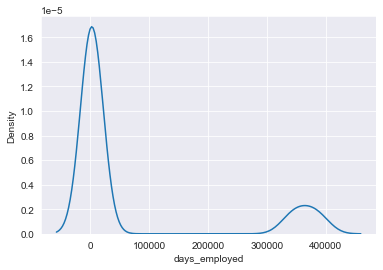

In [9]:
import seaborn as sns
sns.kdeplot(df['days_employed'])

Выведем список уникальных значений столбца `children`.

In [10]:
df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

Как мы видим, в столбце `children` есть два аномальных значения. Исправим ситуацию.

In [11]:
df = df[(df['children'] >= 0) & (df['children'] < 20)]

Проверим результаты работы.

In [12]:
df['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Работа с пропусками (продолжение)

Теперь, когда значения стобца `days_employed` исправлены, мы можем заполнить пропуски медианными значениями для каждого типа занятости `income_type`.

In [13]:
for t in df['income_type'].unique():
    df.loc[(df['income_type'] == t) & (df['days_employed'].isna()), 'days_employed'] = \
    df.loc[(df['income_type'] == t), 'days_employed'].median()

Проверим, что все пропуски заполнены.

In [14]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Исправление типа данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [15]:
df['total_income'] = df['total_income'].astype(int)

### Дубликаты

Выведем на экран количество строк-дубликатов в данных. Если такие строки есть, то удалим их.

In [16]:
df.duplicated().sum()

54

In [17]:
df = df.drop_duplicates()

Теперь перейдем к неявным дубликатам в столбце `education`.

In [18]:
df['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Как мы видим, одни и те же слова записаны разным образом. Приведем их к единому стилю и проверим результат.

In [19]:
df['education'] = df['education'].str.lower()

In [20]:
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

### Категоризация данных

Данные становятся понятнее, когда мы их группируем. Так, доходы можно условно разбить на 5 групп:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

Напишем функцию `categorize_income`, которая определит категорию дохода для конкретного случая.

In [21]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

Теперь применим эту функцию к нашим данным и сохраним результаты в отдельном столбце.

In [22]:
df['total_income_category'] = df['total_income'].apply(categorize_income)

Обратимся к перечню уникальных целей взятия кредита из столбца `purpose`.

In [23]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Как мы видим, здесь есть несколько ключевых позиций, которые по-разному представлены в списке. Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [24]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

Применим функцию к нашей таблице и сохраним результат в отдельный столбец.

In [25]:
df['purpose_category'] = df['purpose'].apply(categorize_purpose)

## Анализ данных

### Есть ли зависимость между количеством детей и возвратом кредита в срок?
Для ответа на вопрос создадим сводную таблицу и посчитаем шанс долга в семьях с разным количеством детей.

In [26]:
data_pivot_children = df.pivot_table(values = ['debt'], index=['children'], aggfunc='sum')
data_pivot_children['total_children'] = df['children'].value_counts()
data_pivot_children['debt_chance_percetage'] = data_pivot_children['debt'] / data_pivot_children['total_children'] * 100
data_pivot_children

,debt,total_children,debt_chance_percetage
children,,,
0,1063,14107,7.535266
1,444,4809,9.232689
2,194,2052,9.454191
3,27,330,8.181818
4,4,41,9.756098
5,0,9,0.000000


**Вывод:** 

Зависимость между количеством детей и возвратом кредита в срок есть. С увеличением количества детей вероятность задержки по кредиту увеличивается примерно на 1-2%.

Данные не совсем однозначные, потому что семьи с тремя детьми выбиваются из общего тренда, хотя и в них вероятность задержки выше.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
data_pivot_family = df.pivot_table(values=['debt'], index='family_status', aggfunc = 'sum')
data_pivot_family['total'] = df['family_status'].value_counts()
data_pivot_family['debt_chance'] = data_pivot_family['debt'] / data_pivot_family['total'] * 100
data_pivot_family.sort_values(by='debt_chance', ascending=False)


,debt,total,debt_chance
family_status,,,
Не женат / не замужем,273,2796,9.763948
гражданский брак,385,4146,9.286059
женат / замужем,927,12266,7.557476
в разводе,84,1189,7.064760
вдовец / вдова,63,951,6.624606


**Вывод:**

Данные говорят в пользу наличия зависимости между семейным положением и возвратом кредита в срок. 

Люди не в браке представляют собой группу риска с вероятностью задержки в примерно 11%. Зарегистрированный брак повышает вероятность возврата кредита в срок примерно на 3%. При этом, гражданский брак имеет менее выраженный эффект (вероятность возврата повышается на <1%). Люди в трудном семейном положении (развод/лишение супруга) с наибольшей вероятностью выплатят кредит в срок.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [28]:
data_pivot_income = df.pivot_table(index=['total_income_category'], columns='debt', values = 'total_income', aggfunc = 'count')
data_pivot_income = data_pivot_income.fillna(0)
data_pivot_income['debt_chance'] = data_pivot_income[1] / data_pivot_income[0] * 100
data_pivot_income.sort_values(by='debt_chance', ascending=False)


debt,0,1,debt_chance
total_income_category,,,
E,20,2,10.000000
C,14585,1353,9.276654
A,23,2,8.695652
B,4660,354,7.596567
D,328,21,6.402439


Уже по таблице мы видим, что общего тренда не намечается. Посмотрим на визуализацию, чтобы подчеркнуть различия между группами.

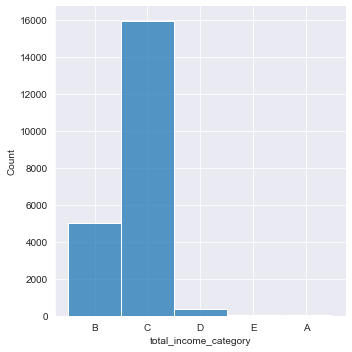

In [29]:
sns.displot(data=df, x='total_income_category')

Как мы видим, категория С (доходы от 50001 до 20000 у.е.) представлена значительно лучше других, а значит наиболее показательна.

Следующая визуализация показывает, что процент должников между группами отличается не равномерно.

<AxesSubplot:title={'center':'debt chance'}, xlabel='total_income_category'>

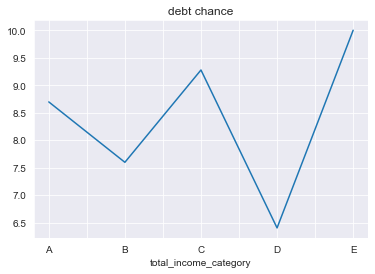

In [30]:
p = data_pivot_income['debt_chance'] = data_pivot_income[1] / data_pivot_income[0] * 100
p.plot(title='debt chance')

Максимальный шанс не вернуть кредит в срок — у группы E, а минимальный — у группы D, хотя они находятся рядом с точки зрения уровня дохода.

**Вывод:** 

На основе имеющихся данных нельзя сделать вывод о существовании зависимости между уровнем дохода и возвратом кредита в срок.

### Как разные цели кредита влияют на его возврат в срок?

In [31]:
data_pivot_purpose = df.pivot_table(index=['purpose_category'], columns='debt', values = 'total_income', aggfunc = 'count')
data_pivot_purpose = data_pivot_purpose.fillna(0)
data_pivot_purpose['debt_chance'] = data_pivot_purpose[1] / data_pivot_purpose[0] * 100
data_pivot_purpose.sort_values(by='debt_chance', ascending=False)

debt,0,1,debt_chance
purpose_category,,,
операции с автомобилем,3881,400,10.306622
получение образования,3620,369,10.193370
проведение свадьбы,2141,183,8.547408
операции с недвижимостью,9974,780,7.820333


**Вывод:** 

Согласно имеющимся данным, операции с недвижимостью наименее рискованные с точки зрения возврата денег (шанс возврата 92%), тогда как операции с автомобилями и образованием, наоборот, наиболее рискованные (шанс возврата 90%). Свадьбы занимают промежуточное положение между названными категориями (шанс возврата 91%).

## Общий вывод.

Вернемся к вопросу, поставленному в начале исследования: влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок? 

Наш ответ: влияние есть. 

С одной стороны, чем больше в семье детей, тем в целом выше вероятность задержки по кредиту. Это можно объяснить ухудшением финансового положения семьи (траты возрастают, а доходы семьи не всегда могут их компенсировать). С другой стороны, семейное положение также играет важную роль. Состояние вне брака выступает как наиболее рискованное с точки зрения возврата кредита в срок. Свободное положение человека, не связанного узами ответственности и взаимопомощи с партнером, может привести к нарушению обязательств.

Таким образом, мы получаем портрет человека, с наиболее высокими шансами оказаться в должниках:

1. Не женат / не замужем;
2. 2е детей;
3. Уровень дохода: 0–30000 у.е.;
4. Цель кредита: операции с автомобилем.